In [1]:
import pandas as pd
import sqlalchemy as sql
import database as db
import betSim as bs
import mysql.connector as mysql
from itertools import combinations
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
df_testing = pd.read_sql_query('SELECT * FROM games WHERE tournamentID = 1', db.engine)


In [2]:
all_keys = ['banList','isFirstOfMatch','isLastOfMatch','isSecondOfMatch']
keys = ['banList']
units , wins, loses, winrate, banList, totalbets, bestunitsovertime, bestKeySet = bs.bestKeysSim(df_testing, keys)

In [3]:
print('best outcome: ')
print('best key set: ')
print(bestKeySet)
print('best exclude list: ')
print(banList)
print(f'units: {str(units)}')
print(f'wins: {str(wins)}')
print(f'loses: {str(loses)}')
print(f'total bets: {str(totalbets)}')
print(f'winrate: {str(winrate)}')


best outcome: 
best key set: 
['banList']
best exclude list: 
['Kwangdong Freecs', 'DWG KIA']
units: 130.86999999999992
wins: 89
loses: 43
total bets: 132
winrate: 0.67


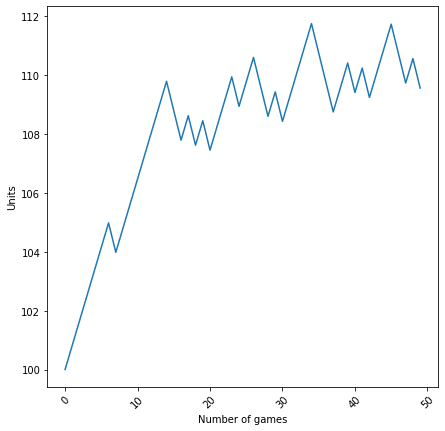

In [4]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)
ax.plot(bestunitsovertime)
ax.set_xlabel('Number of games')
ax.set_ylabel('Units')
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.tick_params(axis='x', rotation=45)

In [5]:
#make all the different dfs for different conditions
df_firstOfMatch = pd.read_sql_query('SELECT * FROM games WHERE tournamentID = 1 and Num_in_Match = 1', db.engine)

In [2]:
#function to get the best key combinations
def bestKeysSim(df_testing, keys):
    #set starting values
    units =100.0
    wins = 0
    loses = 0
    bestbanlist = []
    bestunitsovertime = []
    bestKeySet = []
    keysCombo = bs.makeCombonations(keys)
    for keylist in keysCombo:
        testUnits = 100
        testWins = 0
        testLoses = 0
        testUnitsOvertime = []
        testbanlist = []
        #units , wins , loses , banList, bestunitsovertime
        testUnits , testWins, testLoses, testbanlist, testUnitsOvertime = bs.runSim(df_testing, 'under', 21.5, 'kills', keylist )
        if(testUnits > units):
            units = testUnits
            wins = testWins
            loses = testLoses
            bestbanlist = testbanlist
            bestunitsovertime = testUnitsOvertime
            bestKeySet = keylist
        
    totalbets = wins + loses
    winrate = round(wins/totalbets,2)
    return units , wins, loses, winrate, bestbanlist, totalbets, bestunitsovertime, bestKeySet

In [4]:
df_numInMatch = pd.read_sql_query('SELECT matchID, COUNT(matchID) FROM games GROUP BY matchID', db.engine)
